## Accessing DM-EFD data


Plotting Nasmyth2 motor torque vs angle.

In [1]:
import sys, time, os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq

from astropy.time import Time, TimeDelta
from lsst_efd_client import EfdClient, merge_packed_time_series

We'll access the EFD instance deployed at the Summit.

In [2]:
client = EfdClient('summit_efd')

In [28]:
t_end = Time("2022-02-17T14:08:10", scale='utc')   # timestamp at end of desired data 
nsec = 0.25*3600 
nsec = 400 # how many seconds of data to retrieve
torque = await client.select_packed_time_series("lsst.sal.ATMCS.measuredTorque", 'nasmyth2MotorTorque',
                                              t_end - TimeDelta(nsec, format='sec'), t_end)
angle = await client.select_packed_time_series("lsst.sal.ATMCS.mount_Nasmyth_Encoders", 
                                               'nasmyth2CalculatedAngle', t_end - TimeDelta(nsec, format='sec'), t_end)

(-3.5, 3.5)

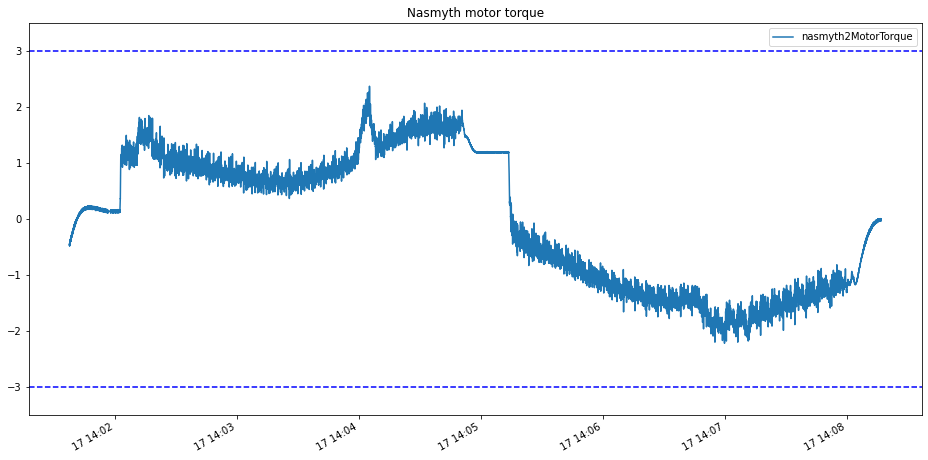

In [30]:
ax1 = torque['nasmyth2MotorTorque'].plot(figsize=(16,8), title='Nasmyth motor torque', legend=True)
ax1.axhline(3.0, color="blue", linestyle="--")
ax1.axhline(-3.0, color="blue", linestyle="--")
plt.ylim(-3.5,3.5)
#angle['nasmyth2CalculatedAngle'].plot(legend=True, secondary_y=True)
#plt.savefig("/home/craiglagegit/DATA/Nasmyth_Torque_05May21.pdf")

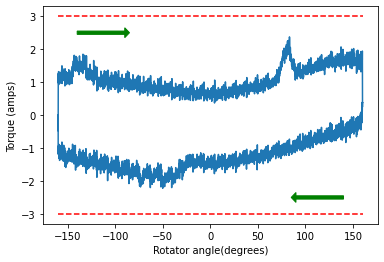

In [32]:
torqueList = torque.values.tolist()
angleList = angle.values.tolist()
plt.figure()
plt.plot(np.array(angleList)[:,0],np.array(torqueList)[:,0])
plt.plot([-160,160],[3.0,3.0], color='red', ls='--')
plt.plot([-160,160],[-3.0,-3.0], color='red', ls='--')
plt.arrow(-140, 2.5, 50,0, width=0.1,head_length = 5.0, color='green')
plt.arrow(140, -2.5, -50,0, width=0.1,head_length = 5.0, color='green')
plt.xlabel("Rotator angle(degrees)")
plt.ylabel("Torque (amps)")
plt.savefig("/home/craiglagegit/DATA/Torque_vs_Angle_17Feb22.pdf")